In [2]:
!pip install -U torch torchvision torchaudio

In [3]:
!pip install 'git+https://github.com/facebookresearch/detectron2.git'

  Cloning https://github.com/facebookresearch/detectron2.git to /tmp/pip-req-build-jgcb4wya
  Running command git clone --filter=blob:none --quiet https://github.com/facebookresearch/detectron2.git /tmp/pip-req-build-jgcb4wya
  Resolved https://github.com/facebookresearch/detectron2.git to commit 5b72c27ae39f99db75d43f18fd1312e1ea934e60
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.2/50.2 kB 4.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.2/78.2 kB 6.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 117.0/117.0 kB 12.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.5/154.5 kB 16.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.5/79.5 kB 7.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 65.8 MB/s eta 0:00:00
  Created wheel for detectron2: filename=detectron2-0.6-cp3

In [1]:
!pip install pycocotools

In [2]:
import torch
import detectron2
from detectron2.utils.logger import setup_logger
setup_logger()

# Import common libraries
import numpy as np
import os, json, cv2, random
from google.colab.patches import cv2_imshow

# Import Detectron2 utilities
from detectron2 import model_zoo
from detectron2.engine import DefaultPredictor, DefaultTrainer
from detectron2.config import get_cfg
from detectron2.utils.visualizer import Visualizer
from detectron2.data import DatasetCatalog, MetadataCatalog

In [12]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [4]:
import os

# List files and directories in My Drive
for root, dirs, files in os.walk('/content/sample_data'):
    print("Root:", root)
    print("Directories:", dirs)
    print("Files:", files)


Root: /content/sample_data
Directories: ['test', 'train', 'val', '.ipynb_checkpoints']
Files: ['README.md', 'anscombe.json', 'california_housing_test.csv', 'mnist_test.csv', 'california_housing_train.csv', 'mnist_train_small.csv']
Root: /content/sample_data/test
Directories: []
Files: ['update_image.jpg']
Root: /content/sample_data/train
Directories: ['.ipynb_checkpoints', 'images']
Files: ['annotations_train.json']
Root: /content/sample_data/train/.ipynb_checkpoints
Directories: []
Files: []
Root: /content/sample_data/train/images
Directories: []
Files: ['be1025a1-IMG_20231221_160205.jpg', 'e6718445-IMG_20231221_123140.jpg', 'a56bf2df-IMG_20231221_155354.jpg', '8f52a469-IMG_20231221_160202.jpg', 'e7aa6e51-IMG_20231221_123257.jpg', 'e9aaee7d-IMG_20231221_130418.jpg', '1cf12e55-IMG_20231221_130416.jpg', '2228d2bf-IMG_20231221_123330.jpg', 'f755c02e-IMG_20231221_134848.jpg']
Root: /content/sample_data/val
Directories: ['.ipynb_checkpoints', 'images']
Files: ['annotations_val.json']
Root:

In [11]:
from detectron2.data.datasets import register_coco_instances

# Register the dataset
register_coco_instances("custom_train", {}, "/content/sample_data/train/annotations_train.json", "/content/sample_data/train")
register_coco_instances("custom_val", {}, "/content/sample_data/val/annotations_val.json", "/content/sample_data/val")

custom_metadata = MetadataCatalog.get("custom_train")

In [12]:
import torch

# Check if GPU is available
if torch.cuda.is_available():
    print(f"GPU is available: {torch.cuda.get_device_name(0)}")
else:
    print("No GPU found")


GPU is available: Tesla T4


In [7]:
!pip install -U detectron2

In [8]:
from detectron2.config import get_cfg
from detectron2.engine import DefaultTrainer
from detectron2.data import MetadataCatalog
import os
from detectron2.model_zoo import model_zoo


cfg = get_cfg()
cfg.merge_from_file(model_zoo.get_config_file("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml"))
cfg.DATASETS.TRAIN = ("custom_train",)
cfg.DATASETS.TEST = ("custom_val",)
cfg.DATALOADER.NUM_WORKERS = 2
cfg.MODEL.WEIGHTS = model_zoo.get_checkpoint_url("COCO-InstanceSegmentation/mask_rcnn_R_50_FPN_3x.yaml")
cfg.SOLVER.IMS_PER_BATCH = 2
cfg.SOLVER.BASE_LR = 0.00025
cfg.SOLVER.MAX_ITER = 300    # Adjust based on your dataset size
cfg.MODEL.ROI_HEADS.BATCH_SIZE_PER_IMAGE = 128
cfg.MODEL.ROI_HEADS.NUM_CLASSES = 2  # Adjust based on your dataset

os.makedirs(cfg.OUTPUT_DIR, exist_ok=True)
trainer = DefaultTrainer(cfg)
trainer.resume_or_load(resume=True) # The method name is resume_or_load
trainer.train()

[09/02 17:07:24 d2.engine.defaults]: Model:
GeneralizedRCNN(
  (backbone): FPN(
    (fpn_lateral2): Conv2d(256, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output2): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral3): Conv2d(512, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output3): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral4): Conv2d(1024, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output4): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (fpn_lateral5): Conv2d(2048, 256, kernel_size=(1, 1), stride=(1, 1))
    (fpn_output5): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (top_block): LastLevelMaxPool()
    (bottom_up): ResNet(
      (stem): BasicStem(
        (conv1): Conv2d(
          3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False
          (norm): FrozenBatchNorm2d(num_features=64, eps=1e-05)
        )
      )
      (res

model_final_f10217.pkl: 178MB [00:01, 124MB/s]                           
roi_heads.box_predictor.bbox_pred.{bias, weight}
roi_heads.box_predictor.cls_score.{bias, weight}
roi_heads.mask_head.predictor.{bias, weight}


[09/02 17:07:26 d2.engine.train_loop]: Starting training from iteration 0


/usr/local/lib/python3.10/dist-packages/torch/functional.py:513: UserWarning: torch.meshgrid: in an upcoming release, it will be required to pass the indexing argument. (Triggered internally at ../aten/src/ATen/native/TensorShape.cpp:3609.)
  return _VF.meshgrid(tensors, **kwargs)  # type: ignore[attr-defined]


[09/02 17:07:51 d2.utils.events]:  eta: 0:03:07  iter: 19  total_loss: 1.91  loss_cls: 0.9954  loss_box_reg: 0.2241  loss_mask: 0.6919  loss_rpn_cls: 0.006465  loss_rpn_loc: 0.01056    time: 0.7086  last_time: 1.1149  data_time: 0.3593  last_data_time: 0.6042   lr: 1.6068e-05  max_mem: 2247M
[09/02 17:08:11 d2.utils.events]:  eta: 0:02:54  iter: 39  total_loss: 1.616  loss_cls: 0.6738  loss_box_reg: 0.2187  loss_mask: 0.6888  loss_rpn_cls: 0.006684  loss_rpn_loc: 0.01283    time: 0.7372  last_time: 0.9328  data_time: 0.3159  last_data_time: 0.5126   lr: 3.2718e-05  max_mem: 2247M
[09/02 17:08:26 d2.utils.events]:  eta: 0:02:42  iter: 59  total_loss: 1.274  loss_cls: 0.3283  loss_box_reg: 0.2509  loss_mask: 0.6817  loss_rpn_cls: 0.005495  loss_rpn_loc: 0.00924    time: 0.7386  last_time: 0.7414  data_time: 0.3236  last_data_time: 0.3256   lr: 4.9367e-05  max_mem: 2247M
[09/02 17:08:41 d2.utils.events]:  eta: 0:02:32  iter: 79  total_loss: 1.166  loss_cls: 0.2205  loss_box_reg: 0.2662  l

In [17]:
import matplotlib.pyplot as plt


[09/02 17:23:12 d2.checkpoint.detection_checkpoint]: [DetectionCheckpointer] Loading from ./output/model_final.pth ...


/usr/local/lib/python3.10/dist-packages/fvcore/common/checkpoint.py:252: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  return torch.load(f, map_location=torch.device("cpu"))

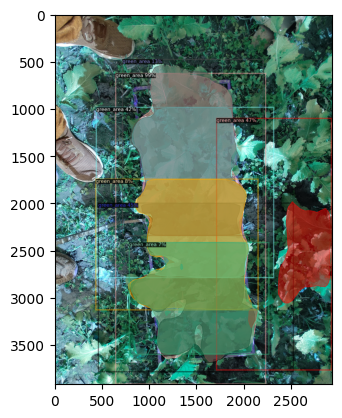

In [18]:
# Load the trained model
cfg.MODEL.WEIGHTS = os.path.join(cfg.OUTPUT_DIR, "model_final.pth")
predictor = DefaultPredictor(cfg)

# Make predictions
im = cv2.imread("/content/sample_data/test/update_image.jpg")
outputs = predictor(im)

# Visualize the results
v = Visualizer(im[:, :, ::-1], MetadataCatalog.get(cfg.DATASETS.TRAIN[0]), scale=1.2)
out = v.draw_instance_predictions(outputs["instances"].to("cpu"))
plt.imshow(out.get_image()[:, :, ::-1])
plt.show()


In [24]:
import os

file_path = '/content/sample_data/train/images\\8f52a469-IMG_20231221_160202.jpg'
print(os.path.exists(file_path))


False
